# Importing

In [37]:
import os
os.getcwd()

'C:\\Users\\vinay\\Desktop\\USA arrests'

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [39]:
#importing dataset
df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [40]:
#looking for missing observations
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [42]:
#scale
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [43]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [44]:
#clustering 
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(df)

In [45]:
#how many sets are there
k_fit.n_clusters

4

In [46]:
k_fit.cluster_centers_

array([[0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313]])

In [47]:
k_fit.labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [48]:
#total errors
k_fit.inertia_

3.690820410392112

In [49]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

# Visualization of Clusters

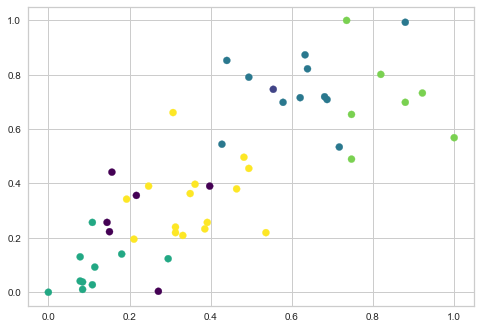

In [50]:
k_means = KMeans(n_clusters=2).fit(df)
clusters = k_means.labels_
type(df)
df = pd.DataFrame(df)

plt.scatter(df.iloc[:, 0],
            df.iloc[:, 1],
            c=kumeler,
            s=50,
            cmap="viridis")
plt.show()

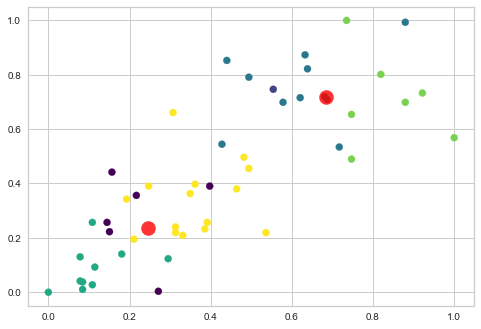

In [51]:
# marking of centers
centers = k_means.cluster_centers_

plt.scatter(df.iloc[:, 0],
            df.iloc[:, 1],
            c=kumeler,
            s=50,
            cmap="viridis")

plt.scatter(merkezler[:, 0],
            merkezler[:, 1],
            c="red",
            s=200,
            alpha=0.8)
plt.show()

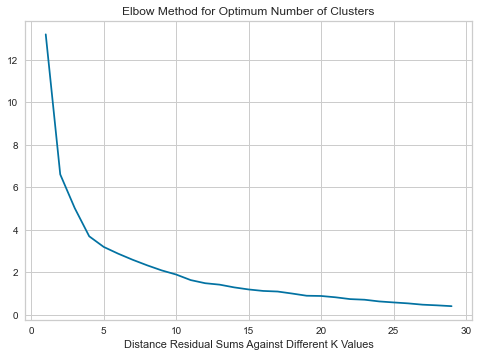

In [52]:
#Determination of the Optimal Number of Clusters
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums Against Different K Values")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()


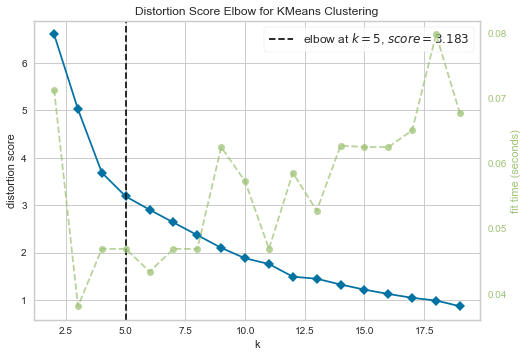

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# A more practical way:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [54]:
elbow.elbow_value_

5

# Creation of Final Clusters

In [55]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)
clusters = kmeans.labels_

In [56]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [57]:
pd.DataFrame({"States": df.index, "Clusters": clusters})

,States,Clusters
0,Alabama,2
1,Alaska,1
2,Arizona,1
3,Arkansas,4
4,California,1
5,Colorado,1
6,Connecticut,0
7,Delaware,4
8,Florida,1
9,Georgia,2


In [63]:
df["cluster_no"] = clusters
df["cluster_no"] = df["cluster_no"] + 1

df.head()

,Murder,Assault,UrbanPop,Rape,cluster_no
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,2


In [64]:
df.groupby("cluster_no").agg({"cluster_no": "count"})

,cluster_no
cluster_no,
1,9
2,12
3,7
4,12
5,10


In [65]:
df.groupby("cluster_no").agg(np.mean)

,Murder,Assault,UrbanPop,Rape
cluster_no,,,,
1,4.955556,125.444444,80.111111,17.788889
2,10.966667,264.000000,76.500000,33.608333
3,14.671429,251.285714,54.285714,21.685714
4,3.091667,76.000000,52.083333,11.833333
5,7.340000,157.000000,63.300000,20.440000


In [66]:
df[df["cluster_no"] == 5]

,Murder,Assault,UrbanPop,Rape,cluster_no
Arkansas,8.8,190,50,19.5,5
Delaware,5.9,238,72,15.8,5
Indiana,7.2,113,65,21.0,5
Kansas,6.0,115,66,18.0,5
Kentucky,9.7,109,52,16.3,5
Missouri,9.0,178,70,28.2,5
Oklahoma,6.6,151,68,20.0,5
Oregon,4.9,159,67,29.3,5
Virginia,8.5,156,63,20.7,5
Wyoming,6.8,161,60,15.6,5


In [67]:
df[df["cluster_no"] == 6]

,Murder,Assault,UrbanPop,Rape,cluster_no
